TP de aprendizaje automtaico

Descripcion de variables

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

Variable de salida (target):

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [154]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt 
import seaborn as sns

In [137]:
casas = pd.read_csv("https://github.com/nacho-gonz/AA1-TUIA-Noir-Gonzalez/raw/master/house-prices-tp.csv")
casas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [133]:
casas['CHAS'] = casas['CHAS'].bfill()
casas["RAD"] = casas["RAD"].fillna(casas['RAD'].median())

In [151]:
imp_mean = IterativeImputer(random_state=0)
casas_imp = imp_mean.fit_transform(casas)
casas_rellenas = pd.DataFrame(casas_imp)
casas_rellenas.columns = casas.columns
casas_rellenas['RAD'] = casas_rellenas['RAD'].astype('int')
casas_rellenas['CHAS'] = casas_rellenas['CHAS'].astype('int')
casas_rellenas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     556 non-null    float64
 1   ZN       556 non-null    float64
 2   INDUS    556 non-null    float64
 3   CHAS     556 non-null    int32  
 4   NOX      556 non-null    float64
 5   RM       556 non-null    float64
 6   AGE      556 non-null    float64
 7   DIS      556 non-null    float64
 8   RAD      556 non-null    int32  
 9   TAX      556 non-null    float64
 10  PTRATIO  556 non-null    float64
 11  B        556 non-null    float64
 12  LSTAT    556 non-null    float64
 13  MEDV     556 non-null    float64
dtypes: float64(12), int32(2)
memory usage: 56.6 KB


c:\Users\sonop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Visualización de los datos

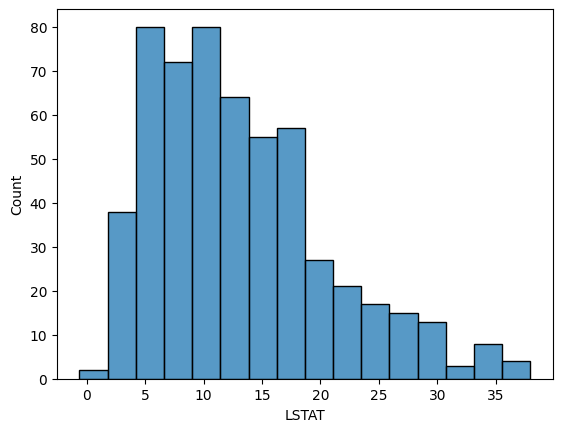

In [173]:
sns.histplot(casas_rellenas['LSTAT'])
plt.show()

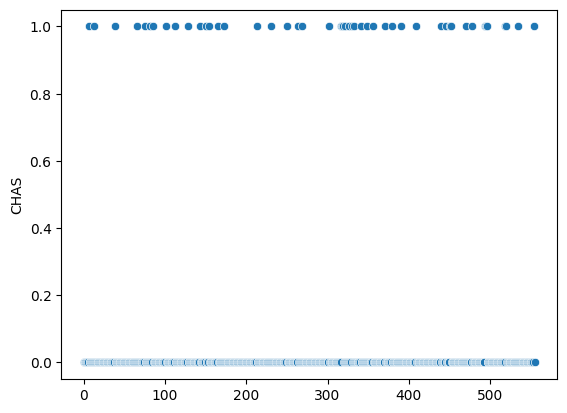

In [177]:
sns.scatterplot(casas_rellenas['CHAS'])
plt.show()